# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# import for ML part : Regression, Polynomial regression, SVR and Decision Tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Load the data

In [2]:
# Load the Titanic dataset
df = pd.read_csv('Student_Performance.csv')

# Exploring the data

In [3]:
# Showing head of data (first 5 rows of data)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# Inspect the dataset
print("Initial Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

Missing Values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


# Data Preprocessing


### Handling missing values
- This data has no missing values

### Defining categorical and numerical columns

In [6]:
# Define numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle categorical data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

### Handling Categorical Data

In [7]:
for column in categorical_columns:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

### Checking for Duplicates

In [8]:
duplicated_rows = df.duplicated()
print("\nNumber of duplicated rows: ", duplicated_rows.sum())


Number of duplicated rows:  127


In [9]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

### Data Visualization

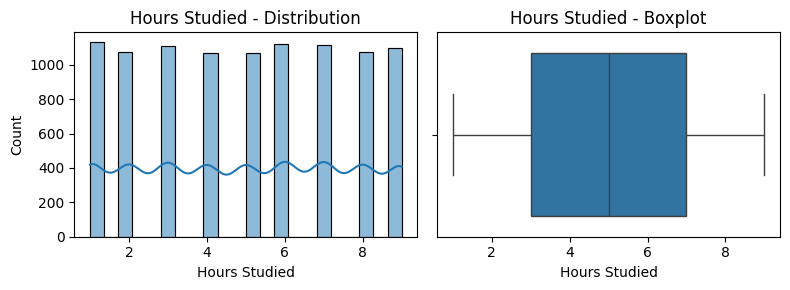

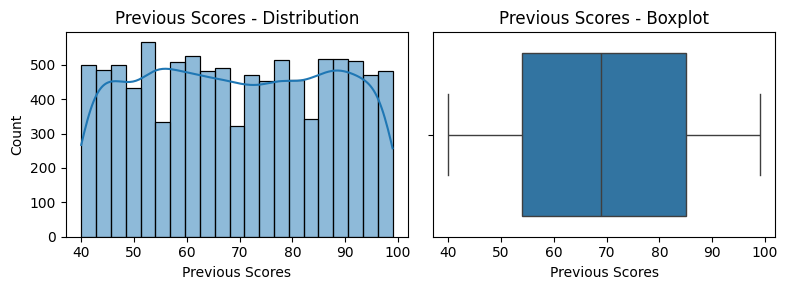

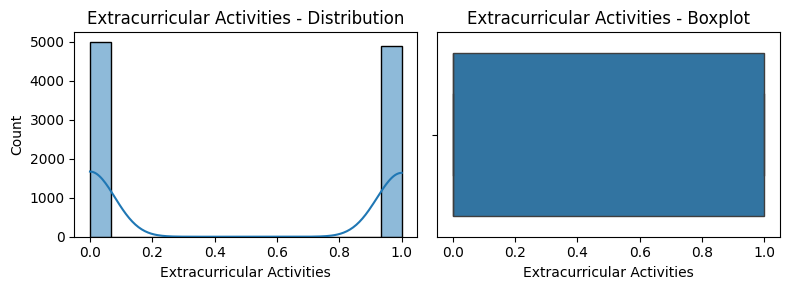

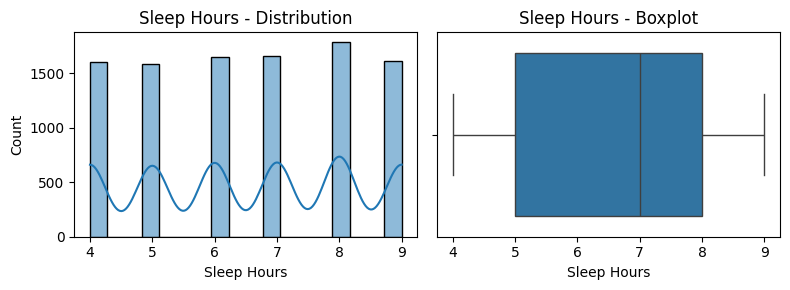

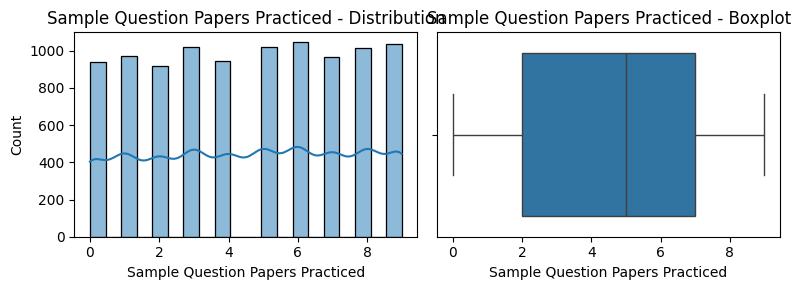

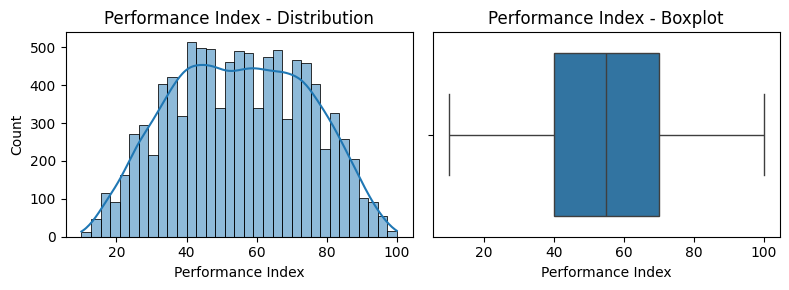

In [10]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

### Removing Outliers

From the plotting we can see that there are no outliers in our data

## EDA

In [11]:
print(f"categorical_columns = {categorical_columns}")
print(f"numeric_features = {numeric_features}")

categorical_columns = ['Extracurricular Activities']
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


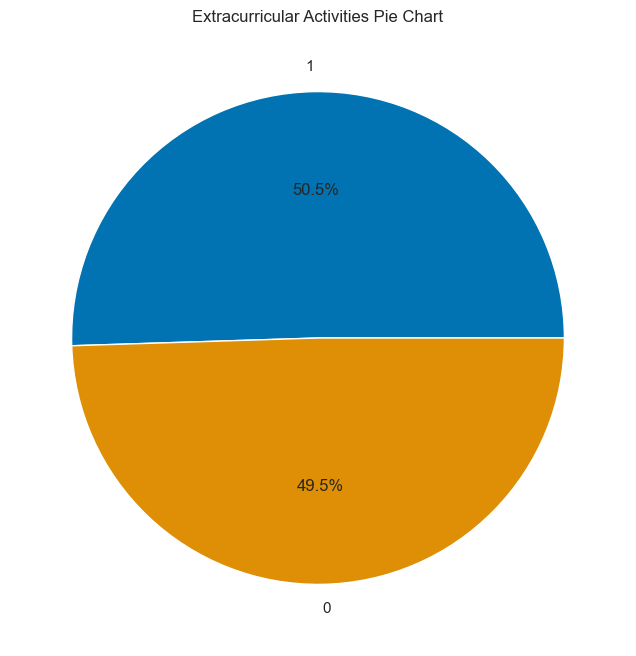

In [12]:
# Visualizing the distribution ExtraCurricular Activities
plt.figure(figsize=(8, 8))
sns.set_theme()  
palette = sns.color_palette("colorblind")  
sns.set_palette(palette)
plt.pie(df["Extracurricular Activities"].value_counts(), labels=df["Extracurricular Activities"].unique(), autopct='%1.1f%%')
plt.title('Extracurricular Activities Pie Chart')
plt.show()

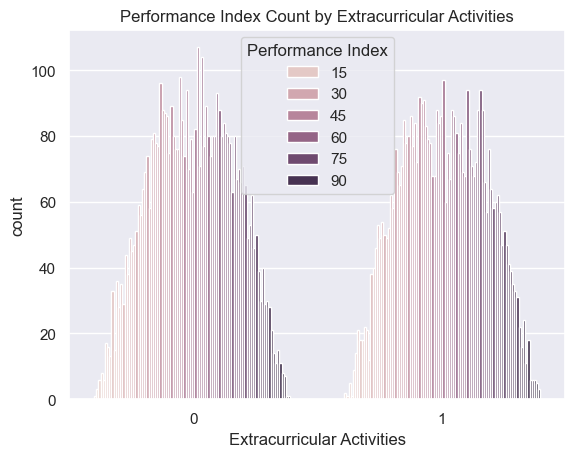

In [13]:
# Visualize Performance Index Rate by Gender
sns.countplot(x='Extracurricular Activities', hue='Performance Index', data=df)
plt.title('Performance Index Count by Extracurricular Activities')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_28316\1417111517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="colorblind", alpha=0.8)


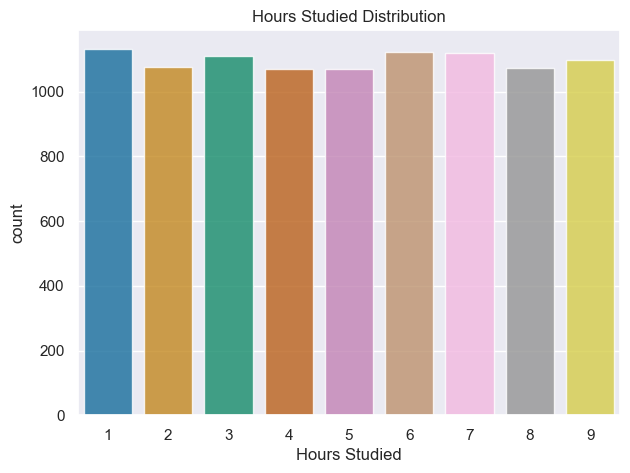

C:\Users\dell\AppData\Local\Temp\ipykernel_28316\1417111517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="colorblind", alpha=0.8)


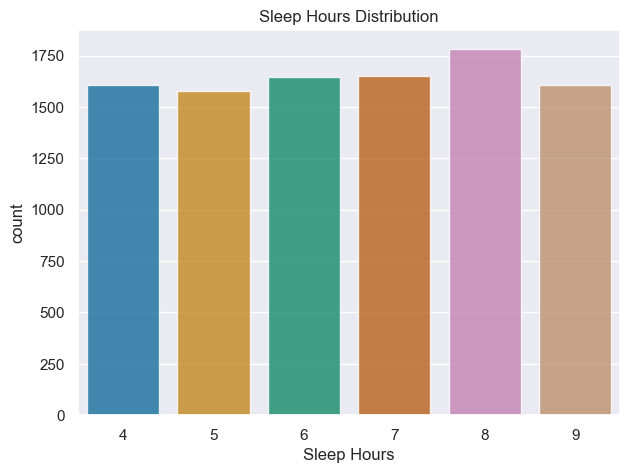

C:\Users\dell\AppData\Local\Temp\ipykernel_28316\1417111517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="colorblind", alpha=0.8)


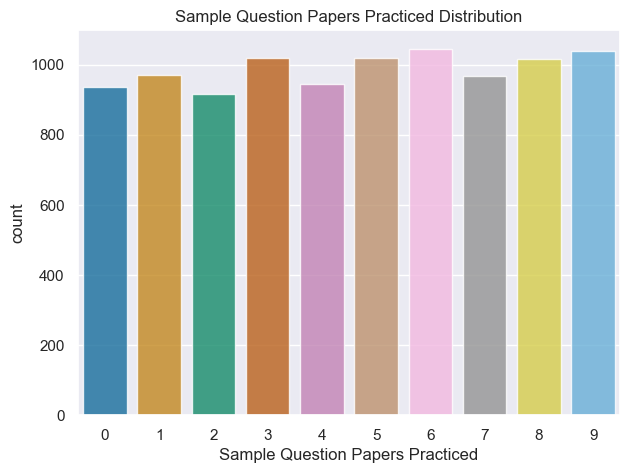

In [14]:
for column in numeric_features:
    if column in ['Performance Index','Previous Scores']:
        continue
    plt.figure(figsize=(7, 5))
    sns.countplot(x=column, data=df, palette="colorblind", alpha=0.8)
    plt.xticks()
    plt.title(f'{column} Distribution')
    plt.show()

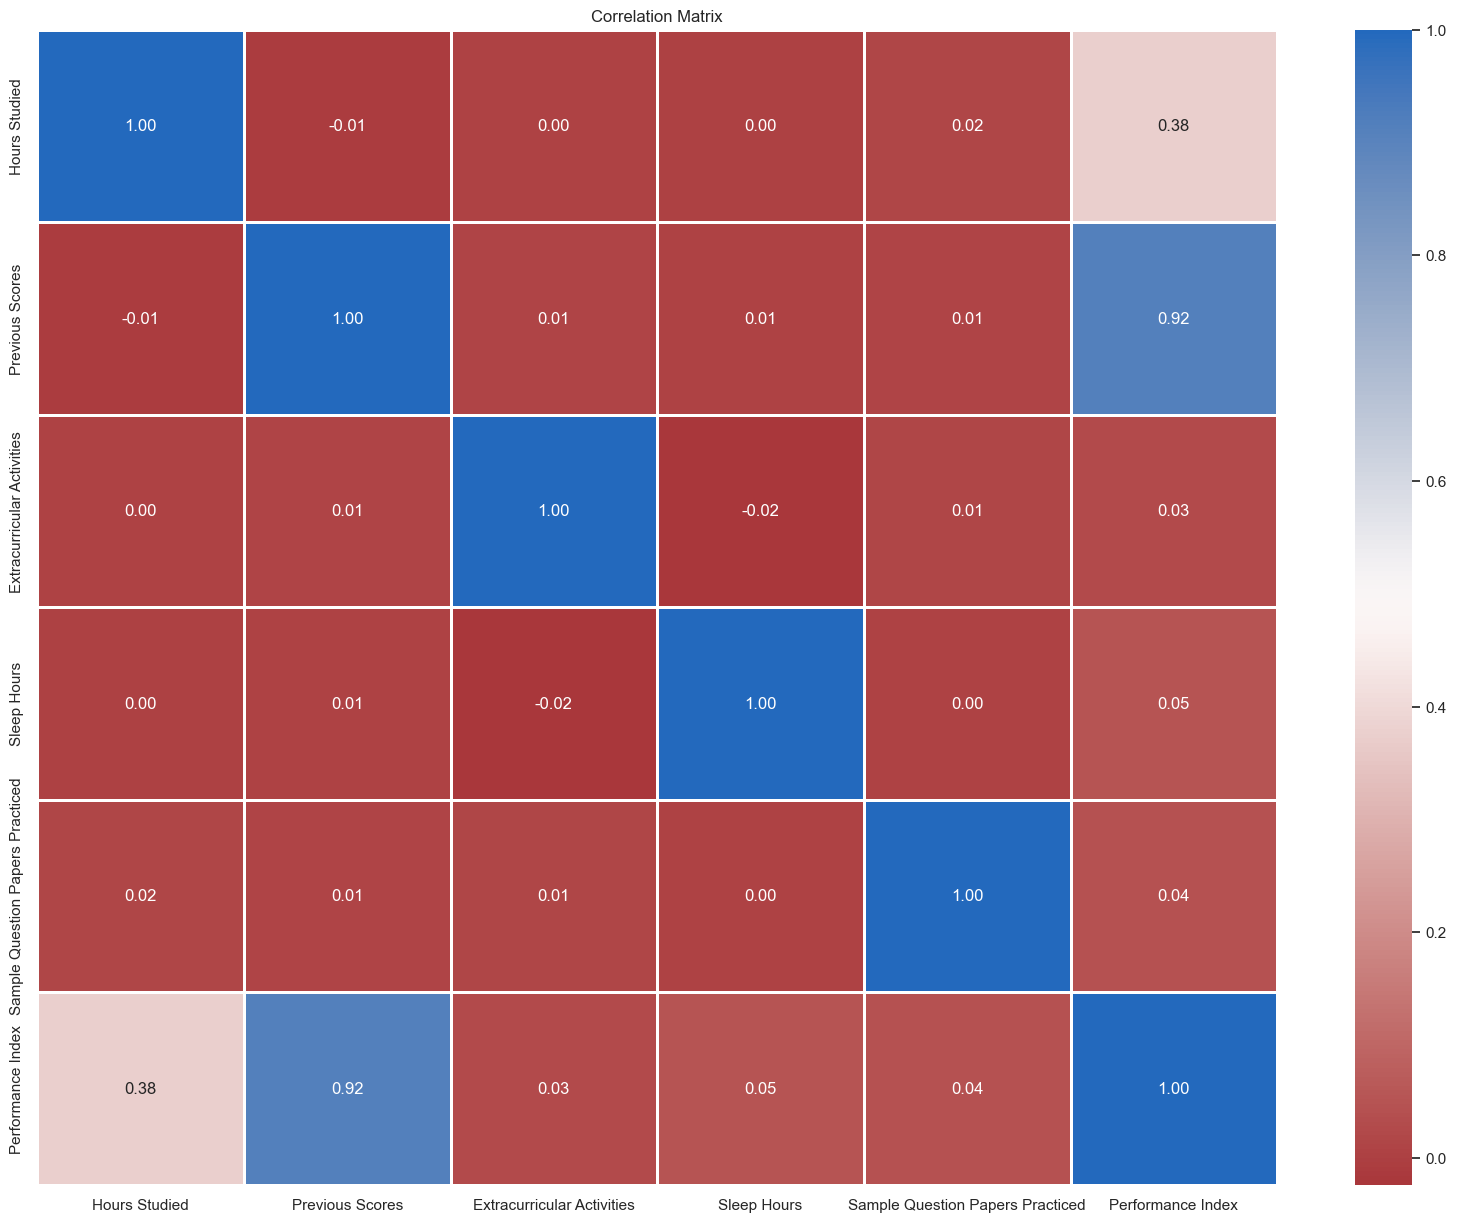

In [15]:
# Correlation Matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True) 
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), cmap='vlag_r', annot=True, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [16]:
# Split the data into features and target
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

# Select the most important features, the CM shows that the most important features are: 'Hours Studied', 'Previous Scores'
X = X[['Hours Studied', 'Previous Scores']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ML Moldels

## 1. Linear Regression

In [17]:
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the target on the training and testing sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [19]:
# Evaluate the model
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.9860324015592469
Test Score: 0.9848221641476423


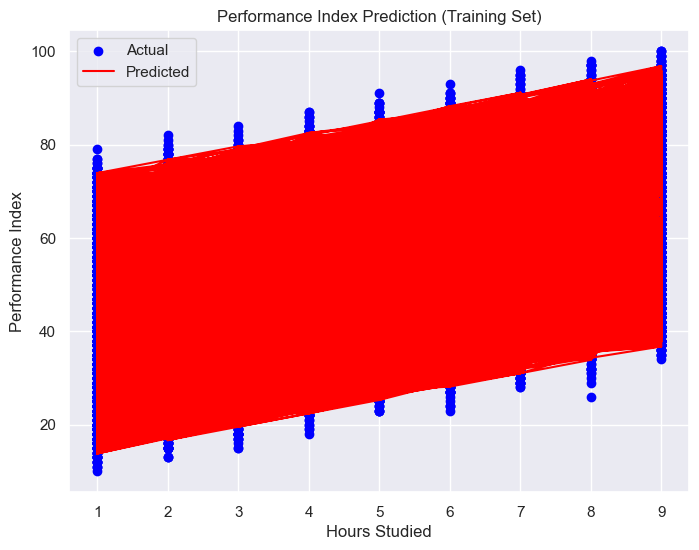

In [20]:
# Visualize the model
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Hours Studied'], y_train, color='blue', label='Actual')
plt.plot(X_train['Hours Studied'], y_train_pred, color='red', label='Predicted')
plt.title('Performance Index Prediction (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

## 2. Polynomial Regression

In [21]:
poly_reg_models= []

for degree in range(2, 30):
    poly_reg = PolynomialFeatures(degree=degree)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)

    # Predict the target on the training and testing sets
    y_train_pred = lin_reg_poly.predict(X_train_poly)
    y_test_pred = lin_reg_poly.predict(X_test_poly)

    # Evaluate the model
    train_score = lin_reg_poly.score(X_train_poly, y_train)
    test_score = lin_reg_poly.score(X_test_poly, y_test)

    poly_reg_models.append({
        'model': lin_reg_poly,
        'degree': degree,
        'train_score': train_score,
        'test_score': test_score,
        "train prediction": y_train_pred,
    })

In [22]:
# Print the results
for model in poly_reg_models:
    print(f"Degree: {model['degree']}, Train Score: {model['train_score']}, Test Score: {model['test_score']}")

Degree: 2, Train Score: 0.98604456852449, Test Score: 0.9848019246487923
Degree: 3, Train Score: 0.9860527328524394, Test Score: 0.9848108870099674
Degree: 4, Train Score: 0.9860620393582099, Test Score: 0.984808256287775
Degree: 5, Train Score: 0.9860702323255797, Test Score: 0.9848064053143225
Degree: 6, Train Score: 0.9860817423628467, Test Score: 0.9848095245557775
Degree: 7, Train Score: 0.9860899859398556, Test Score: 0.9847996127159684
Degree: 8, Train Score: 0.9860892892470019, Test Score: 0.9847959250958324
Degree: 9, Train Score: 0.9860801689325064, Test Score: 0.9847551511932311
Degree: 10, Train Score: 0.9860416965218948, Test Score: 0.9847406946120156
Degree: 11, Train Score: 0.986004984602632, Test Score: 0.9846804225854026
Degree: 12, Train Score: 0.9836237615698141, Test Score: 0.9824336535722922
Degree: 13, Train Score: 0.9682833586082803, Test Score: 0.9661405796562225
Degree: 14, Train Score: 0.9759926915444551, Test Score: 0.9734128511768446
Degree: 15, Train Score:

In [23]:
# Select the best model
best_poly_reg_model = max(poly_reg_models, key=lambda x: x['test_score'])
print(f"Best Model: Degree {best_poly_reg_model['degree']} with Test Score {best_poly_reg_model['test_score']}")

Best Model: Degree 3 with Test Score 0.9848108870099674


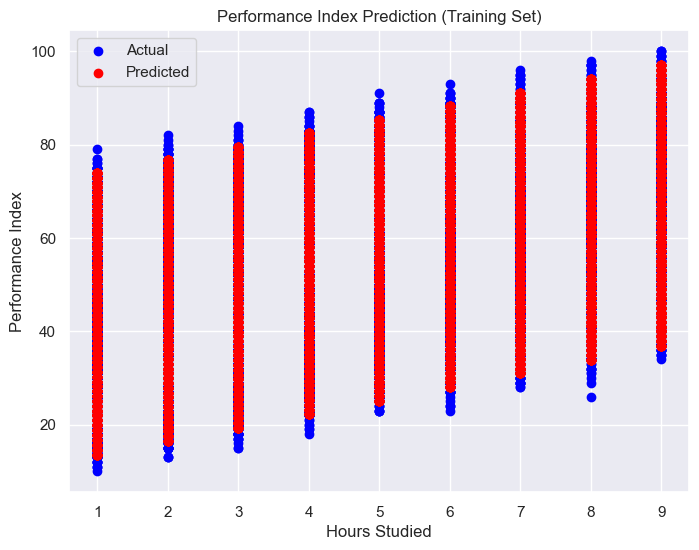

In [24]:
# Visualize the best model
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Hours Studied'], y_train, color='blue', label='Actual')
plt.scatter(X_train['Hours Studied'], best_poly_reg_model['train prediction'], color='red', label='Predicted')
plt.title('Performance Index Prediction (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

## 3. Support Vector Regression (SVR)

In [25]:
# Support Vector Regression

# Define different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train the models
svr_models = []
for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    X_train_pred = svr.predict(X_train)
    train_score = svr.score(X_train, y_train)
    test_score = svr.score(X_test, y_test)
    svr_models.append({
        'model': svr,
        'kernel': kernel,
        'train_score': train_score,
        'test_score': test_score,
        'train_prediction': X_train_pred
    })

In [26]:
# Print the results
for model in svr_models:
    print(f"Kernel: {model['kernel']}, Train Score: {model['train_score']}, Test Score: {model['test_score']}")

Kernel: linear, Train Score: 0.9860311500574029, Test Score: 0.9848226199221579
Kernel: poly, Train Score: 0.9318603929994167, Test Score: 0.9313618994080046
Kernel: rbf, Train Score: 0.9836122591074854, Test Score: 0.9826792998255505
Kernel: sigmoid, Train Score: -98.30198011094612, Test Score: -98.16215119465731


In [27]:
# Select the best model
best_svr_model = max(svr_models, key=lambda x: x['test_score'])
print(f"Best Model: Kernel {best_svr_model['kernel']} with Test Score {best_svr_model['test_score']}")

Best Model: Kernel linear with Test Score 0.9848226199221579


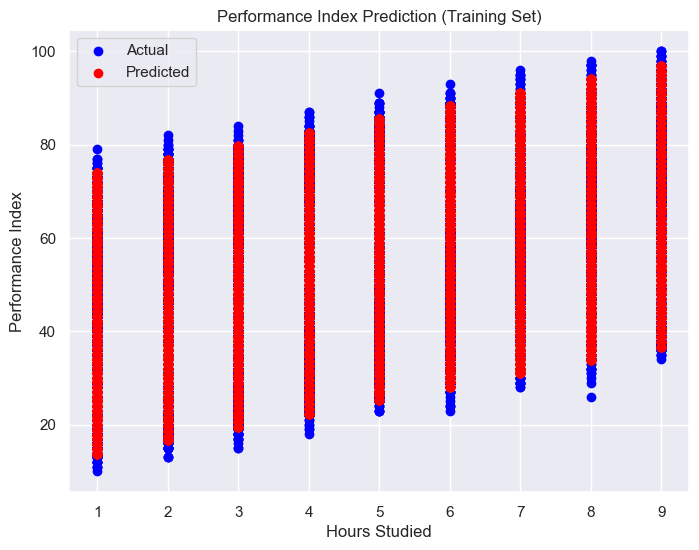

In [28]:
# Visualize the best model
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Hours Studied'], y_train, color='blue', label='Actual')
plt.scatter(X_train['Hours Studied'], best_svr_model['train_prediction'], color='red', label='Predicted')
plt.title('Performance Index Prediction (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

## 4. Decision Tree Regression

In [29]:
# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
X_train_pred = decision_tree.predict(X_train)
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test, y_test)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.9869347739541714
Test Score: 0.9837080827000423


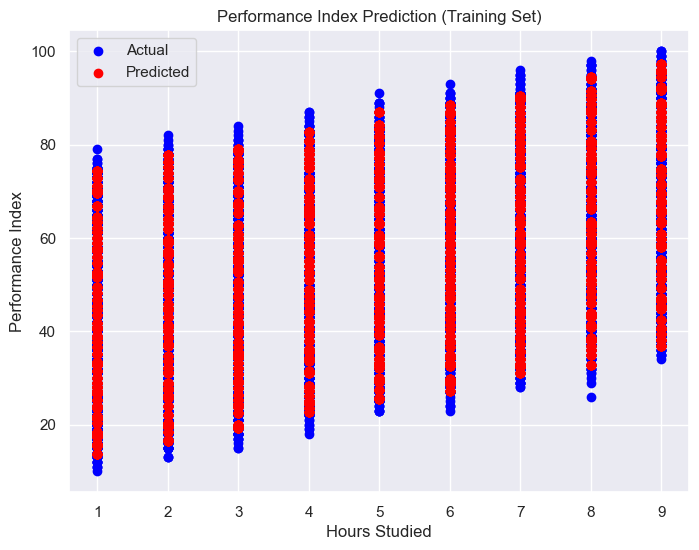

In [31]:
# Visualize the model
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Hours Studied'], y_train, color='blue', label='Actual')
plt.scatter(X_train['Hours Studied'], X_train_pred, color='red', label='Predicted')
plt.title('Performance Index Prediction (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

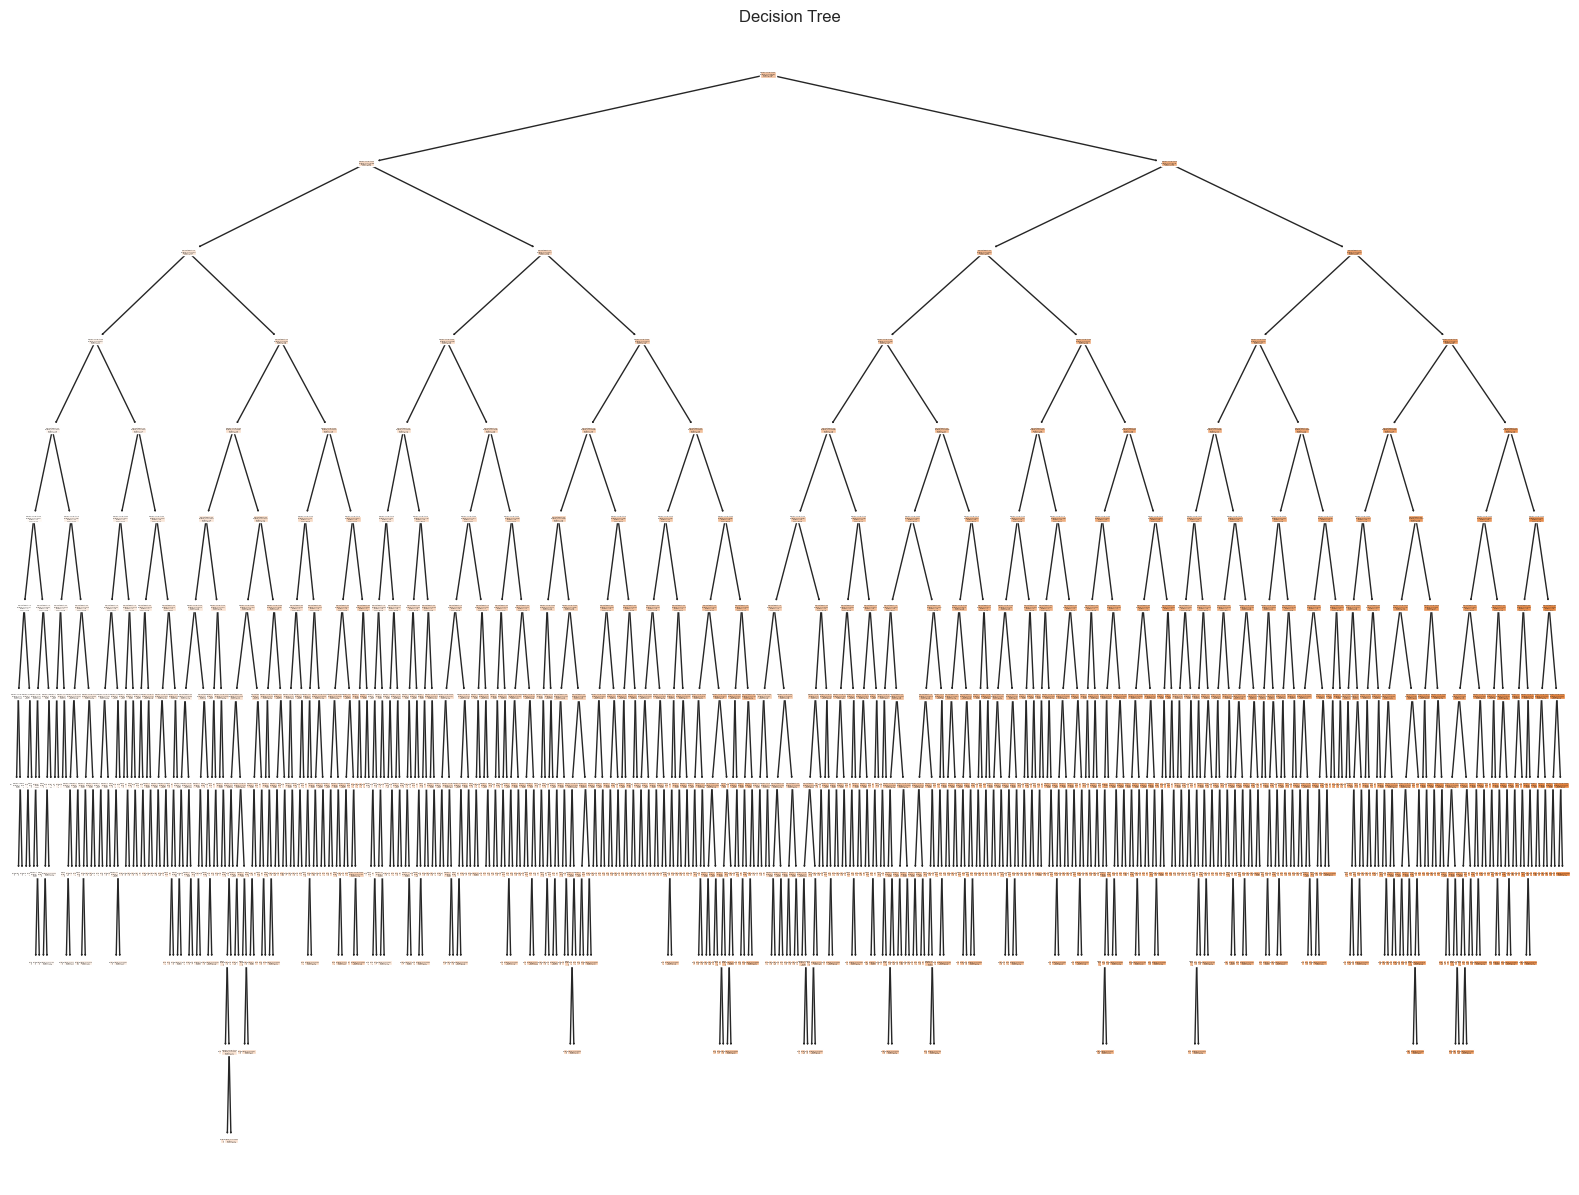

In [32]:
# Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.title('Decision Tree')
plt.show()

In [33]:
# this shape of the tree is not good because of the continous features, we can use the max_depth parameter to limit the depth of the tree
decision_tree_3 = DecisionTreeRegressor(max_depth=3)
decision_tree_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
X_train_pred = decision_tree_3.predict(X_train)
train_score = decision_tree_3.score(X_train, y_train)
test_score = decision_tree_3.score(X_test, y_test)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.8974049400000261
Test Score: 0.8907153605796493


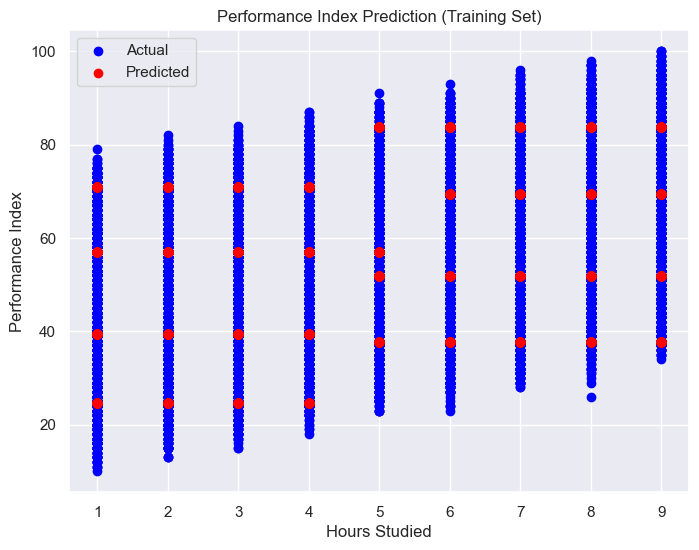

In [35]:
# Visualize the model
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Hours Studied'], y_train, color='blue', label='Actual')
plt.scatter(X_train['Hours Studied'], X_train_pred, color='red', label='Predicted')
plt.title('Performance Index Prediction (Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()
plt.show()

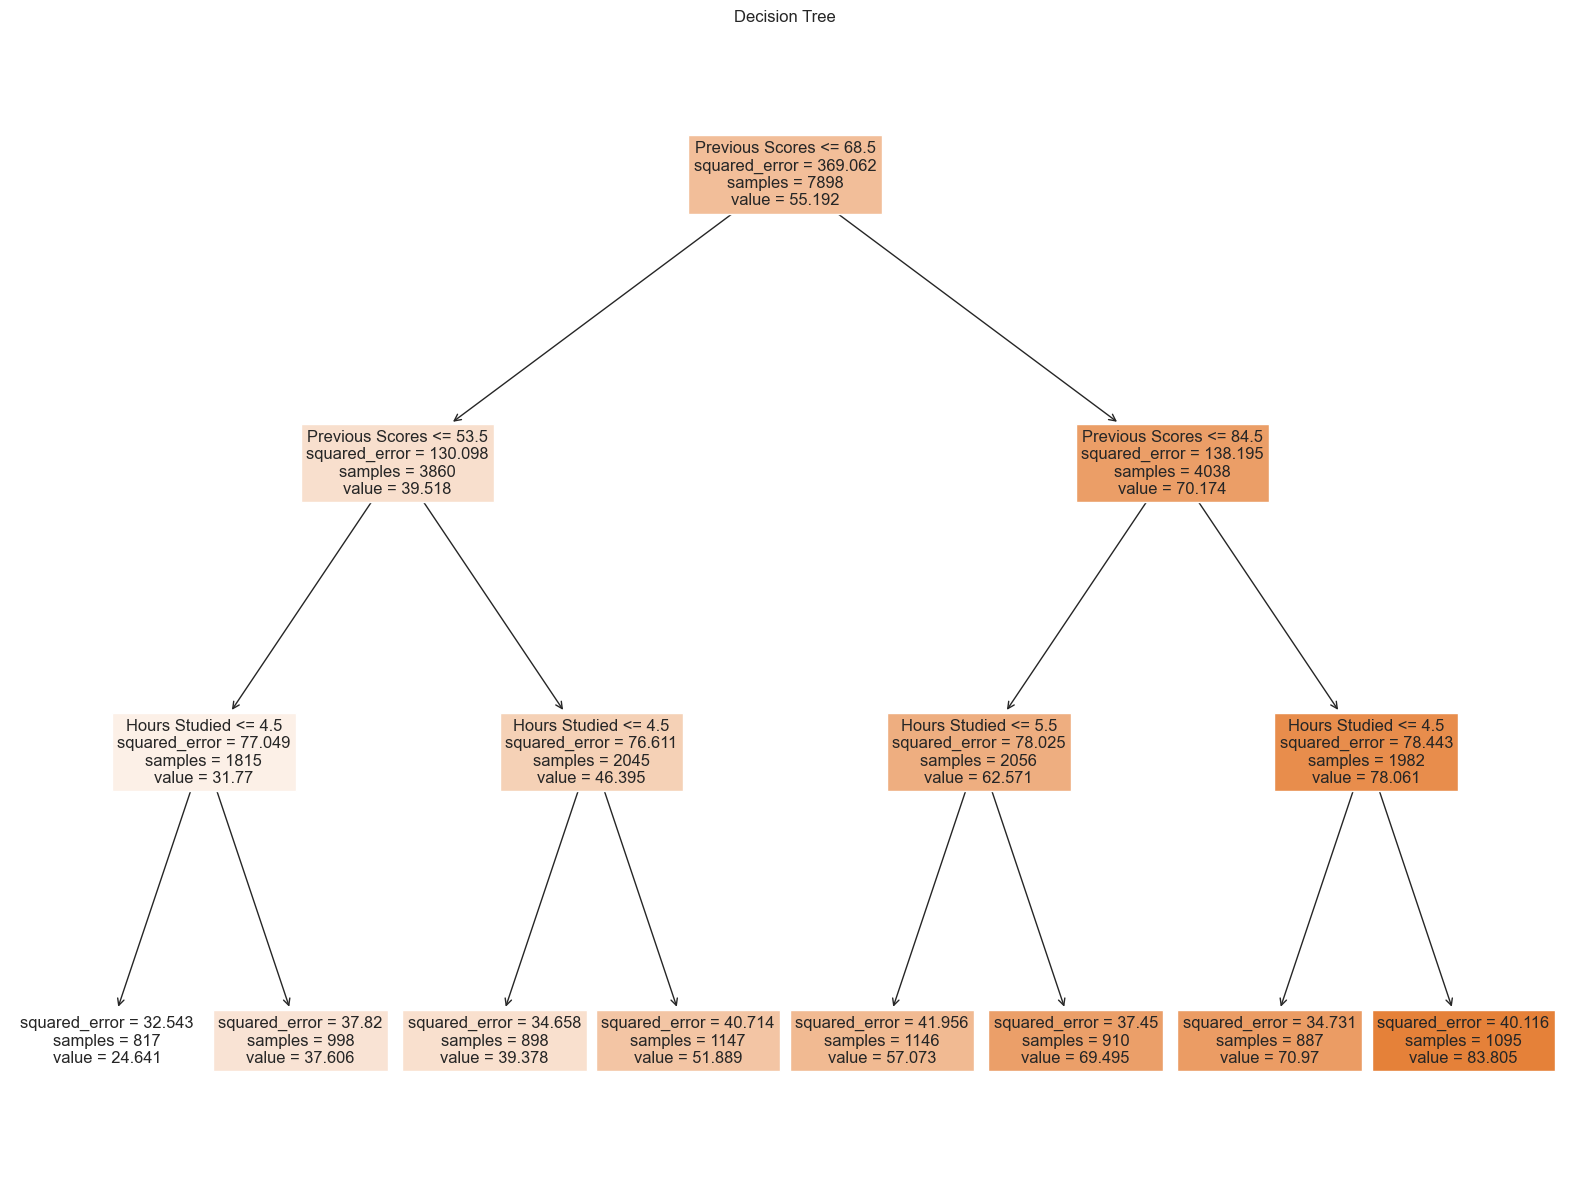

In [36]:
# Visualize the tree
plt.figure(figsize=(20, 15))
plot_tree(decision_tree_3, filled=True, feature_names=X.columns)
plt.title('Decision Tree')
plt.show()

In [37]:
# Here we can see the more value of the depth the more the tree is complex and the more the model is overfitting
# we can use the max_depth parameter to limit the depth of the tree

# Addional part - Ensamble Learning

In [38]:
# As we build many models, we can use all of them together to predict the target and get the average of the predictions
# This is called Ensemble Learning
# We can use the Voting Regressor to combine the models
from sklearn.ensemble import VotingRegressor

In [39]:
# Define the models
estimators = [
    ('linear_regression', lin_reg),
    ('polynomial_regression', best_poly_reg_model['model']),
    ('svr', best_svr_model['model']),
    ('decision_tree', decision_tree_3)
]

In [40]:
# Train the Voting Regressor
voting_regressor = VotingRegressor(estimators)
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_regression', LinearRegression()),
                            ('polynomial_regression', LinearRegression()),
                            ('svr', SVR(kernel='linear')),
                            ('decision_tree',
                             DecisionTreeRegressor(max_depth=3))])

In [41]:
# Predict the target on the training and testing sets
y_train_pred = voting_regressor.predict(X_train)
y_test_pred = voting_regressor.predict(X_test)

# Evaluate the model
train_score = voting_regressor.score(X_train, y_train)
test_score = voting_regressor.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.9805397242929847
Test Score: 0.9789615337017824
